<a href="https://colab.research.google.com/github/tecexbarto/Emotions_project/blob/main/Modelos_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Sin Data Augmentation

In [ ]:
%pip install qdtm

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#librerias para dividir datos
from sklearn.model_selection import train_test_split

#librerias para acceder a carpetas e importar archivos
from tqdm import tqdm
import glob
import os
import cv2

#librerias para data augmentation
import imgaug.augmenters as iaa

#librerias para trabajar con datos
import numpy as np
import pandas as pd

In [ ]:
#extracción de datos para train


# Definir el orden de las subcarpetas, esto se hace porque colab las lee de forma aleatoria y así aseguramos siempre el mismo orden
orden_subcarpetas = ["sad", "disgust", "fear", "surprise", "neutral", "happy","angry"]

# Procedemos a cargar la carpeta train que contiene varias subcarpetas, cada una de ellas es una emoción
print("Cargando dataset de imágenes:")

X_train, Y_train, X_val, Y_val = [], [], [], []

# Obtener la lista de subcarpetas en el orden deseado
subfolders = sorted(glob.glob("train/*"), key=lambda x: orden_subcarpetas.index(os.path.basename(x)))

for index, file in enumerate(subfolders): # Recorremos las subcarpetas
  print(file.split("\\")[-1])
  label = np.zeros(7) # Creamos un vector con 7 casillas rellenas a 0, cada casilla es una etiqueta
  label[index] = 1 # Rellenamos con un 1 el índice por el que se encuentra, por lo que, habiendo 7 casillas con 0, la que tenga un 1 indica la emoción que es
  Xaux, Yaux = [], []
  for imagepath in tqdm(glob.glob(f"{file}/*.jpg")): # Recorremos las imágenes de cada carpeta
    image = cv2.imread(imagepath, 0) # El 0 hace que lea la imagen en ByN
    del imagepath
    Xaux.append(image)
    Yaux.append(label) # Guardamos también las etiquetas de las imágenes

  # Aquí, como las imágenes van agrupadas en carpetas, para cada carpeta,
  # que es una emoción, cogemos el 90% para entrenar y el 10% restante para la validación
  #N_images = len(Xaux)
  #data_split = round(N_images * 0.90)
  X_train += Xaux#[:data_split]
 # X_val += Xaux[data_split:]
  Y_train += Yaux#[:data_split]
  #Y_val += Yaux[data_split:]

# Convertir listas a arrays numpy
X_train = np.array(X_train)
#X_val = np.array(X_val)
Y_train = np.array(Y_train)
#Y_val = np.array(Y_val)

# Mostrar tanto el número de muestras como el número de etiquetas para el entrenamiento y la validación
print("[+] Número de muestras para el entrenamiento:", X_train.shape[0])
#print("[+] Número de muestras para la validación:", X_val.shape[0])
print("[+] Número de etiquetas de entrenamiento:", Y_train.shape[0])
#print("[+] Número de etiquetas de validación:", Y_val.shape[0])

Cargando dataset de imágenes:
/Users/demyramirez/Documents/Demy/Pontia.tech/data/archive/train/sad


100%|██████████| 4830/4830 [00:00<00:00, 5058.18it/s]


/Users/demyramirez/Documents/Demy/Pontia.tech/data/archive/train/disgust


100%|██████████| 436/436 [00:00<00:00, 4174.57it/s]


/Users/demyramirez/Documents/Demy/Pontia.tech/data/archive/train/fear


100%|██████████| 4097/4097 [00:00<00:00, 4786.40it/s]


/Users/demyramirez/Documents/Demy/Pontia.tech/data/archive/train/surprise


100%|██████████| 3171/3171 [00:00<00:00, 4935.48it/s]


/Users/demyramirez/Documents/Demy/Pontia.tech/data/archive/train/neutral


100%|██████████| 4965/4965 [00:00<00:00, 5008.59it/s]


/Users/demyramirez/Documents/Demy/Pontia.tech/data/archive/train/happy


100%|██████████| 7215/7215 [00:01<00:00, 5190.76it/s]


/Users/demyramirez/Documents/Demy/Pontia.tech/data/archive/train/angry


100%|██████████| 3995/3995 [00:00<00:00, 5255.07it/s]


[+] Número de muestras para el entrenamiento: 28709
[+] Número de etiquetas de entrenamiento: 28709


In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
#X_val_flat = X_val.reshape(X_val.shape[0], -1)
Y_train_labels = np.argmax(Y_train, axis=1)

<h2>Test

In [ ]:
#extracción de datos para test

# Definir el orden de las subcarpetas, esto se hace porque colab las lee de forma aleatoria y así aseguramos siempre el mismo orden
orden_subcarpetas = ["sad", "disgust", "fear", "surprise", "neutral", "happy", "angry"]
# Comenzamos leyendo todas las subcarpetas que se encuentran en la carpeta "test" para ir cargando las imágenes con las que hacer luego predicciones
print("Cargando dataset de imágenes para hacer predicciones...")
Xtest, Ytest = [], []
# Obtener la lista de subcarpetas en el orden deseado
subfolders = sorted(glob.glob("test/*"), key=lambda x:
orden_subcarpetas.index(os.path.basename(x)))

for index, file in enumerate(subfolders):
  print(file.split("/")[-1])
  label = np.zeros(7) # Creamos un vector con 7 casillas rellenas a 0, cada casilla es una etiqueta
  label[index] = 1 # Rellenamos con un 1 el índice por el que se encuentra, por lo que, habiendo 7 casillas con 0, la que tenga un 1 indica la emoción que es
  Xaux, Yaux = [], []
  for imagepath in tqdm(glob.glob(f"{file}/*.jpg")):
    image = cv2.imread(imagepath, 0) # El 1 hace que lea la imagen con 3 canales
    Xaux.append(image)
    Yaux.append(label) # Guardamos las etiquetas de las emociones
  Xtest = Xtest + Xaux
  Ytest = Ytest + Yaux
  del Xaux, Yaux
X_test = np.array(Xtest)
Y_test = np.array(Ytest)
del Xtest, Ytest

Cargando dataset de imágenes para hacer predicciones...
sad


100%|██████████| 1247/1247 [00:00<00:00, 4213.11it/s]


disgust


100%|██████████| 111/111 [00:00<00:00, 6281.10it/s]


fear


100%|██████████| 1024/1024 [00:00<00:00, 4091.19it/s]


surprise


100%|██████████| 831/831 [00:00<00:00, 4157.93it/s]


neutral


100%|██████████| 1233/1233 [00:00<00:00, 2998.80it/s]


happy


100%|██████████| 1774/1774 [00:00<00:00, 4656.86it/s]


angry


100%|██████████| 958/958 [00:00<00:00, 4521.92it/s]


In [ ]:
X_test_flat = X_test.reshape(X_test.shape[0], -1)
Y_test_labels = np.argmax(Y_test, axis=1)

<h2>Modelos (sin data augmentation)

In [ ]:
#librerias
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn import tree
import sys
import seaborn as sns
import matplotlib.pyplot as plt

<h3>Random Forest

In [ ]:
random_state = 42
modelo_2 = RandomForestClassifier(n_jobs=-1,random_state=random_state).fit(X_train_flat, Y_train_labels)

In [ ]:
test_pred2 = modelo_2.predict(X_test_flat)

Métricas de rendimiento del modelo elegido anteriormente:
- Precision del modelo: 56.16933977496837 %
- Accuracy del modelo: 47.24157146837559 %


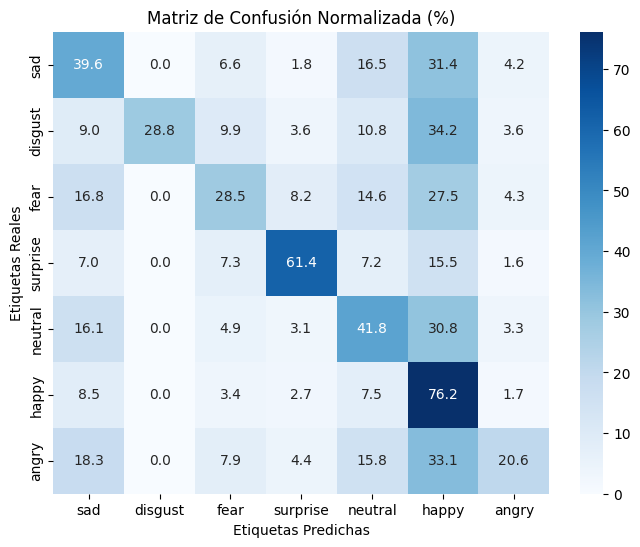

In [ ]:
# Calculamos las diferentes métricas de rendimiento del modelo escogido

precision = precision_score(Y_test_labels, test_pred2, average='macro')
accuracy = np.mean(test_pred2 == Y_test_labels)

precision *= 100
accuracy *= 100

resultados = pd.DataFrame({"Emoción": Y_test_labels, "Predicción Emoción": test_pred2})
resultados["Correcto"] = resultados["Emoción"] == resultados["Predicción Emoción"]

# Mostramos las diferentes métricas
print("Métricas de rendimiento del modelo elegido anteriormente:")
print("- Precision del modelo:", precision, "%")
print("- Accuracy del modelo:", accuracy, "%")

# Definir las etiquetas de las emociones
emociones = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(Y_test_labels, test_pred2)
confusion_percent = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]* 100
# Mostrar la matriz de confusión normalizada en forma gráfica
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_percent, annot=True, cmap='Blues', fmt='.1f',
xticklabels=orden_subcarpetas, yticklabels=orden_subcarpetas)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión Normalizada (%)')
plt.savefig('matriz_confusion.jpg')
plt.show()


<h3>SVM

In [ ]:
epochs = 10000
epochs_during_hyperopt = 500
kernel = 'rbf'  # 'rbf', 'linear', 'poly' or 'sigmoid'
decision_function = 'ovr'  # 'ovo' for OneVsOne and 'ovr' for OneVsRest'
features = "landmarks_and_hog" # "landmarks" or "hog" or "landmarks_and_hog"
gamma = 'auto' # use a float number or 'auto'
modelo_1 = SVC(random_state=random_state, max_iter=epochs, kernel=kernel, decision_function_shape=decision_function, gamma=gamma).fit(X_train_flat, Y_train_labels)


/Users/demyramirez/anaconda3/envs/mldl/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
test_pred1 = modelo_1.predict(X_test_flat)

Métricas de rendimiento del modelo elegido anteriormente:
- Precision del modelo: 85.44664567174961 %
- Accuracy del modelo: 31.554750626915574 %


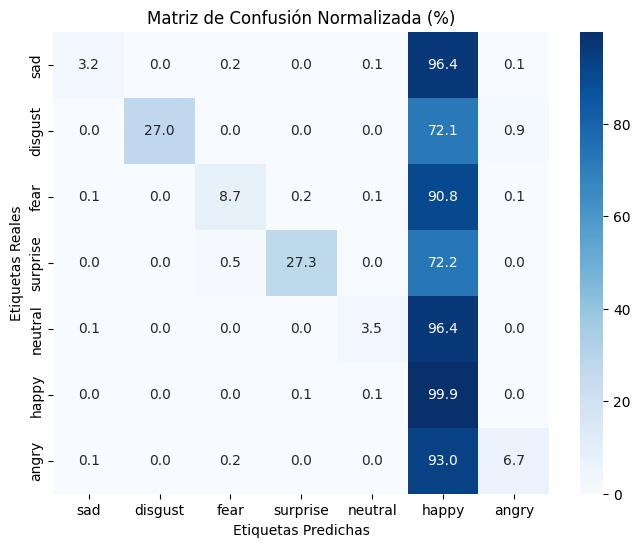

In [ ]:
# Calculamos las diferentes métricas de rendimiento del modelo escogido

precision = precision_score(Y_test_labels, test_pred1, average='macro')
accuracy = np.mean(test_pred1 == Y_test_labels)


precision *= 100
accuracy *= 100

resultados = pd.DataFrame({"Emoción": Y_test_labels, "Predicción Emoción": test_pred1})
resultados["Correcto"] = resultados["Emoción"] == resultados["Predicción Emoción"]

# Mostramos las diferentes métricas
print("Métricas de rendimiento del modelo elegido anteriormente:")
print("- Precision del modelo:", precision, "%")
print("- Accuracy del modelo:", accuracy, "%")

# Definir las etiquetas de las emociones
emociones = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(Y_test_labels, test_pred1)
confusion_percent = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]* 100
# Mostrar la matriz de confusión normalizada en forma gráfica
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_percent, annot=True, cmap='Blues', fmt='.1f',
xticklabels=orden_subcarpetas, yticklabels=orden_subcarpetas)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión Normalizada (%)')
plt.savefig('matriz_confusion.jpg')
plt.show()


In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', LinearSVC(dual=True, random_state=42))
]).fit(X_train_flat, Y_train_labels)

/Users/demyramirez/anaconda3/envs/mldl/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
test_pred2 = pipeline.predict(X_test_flat)

Métricas de rendimiento del modelo elegido anteriormente:
- Precision del modelo: 24.731091491158878 %
- Accuracy del modelo: 28.657007522986905 %


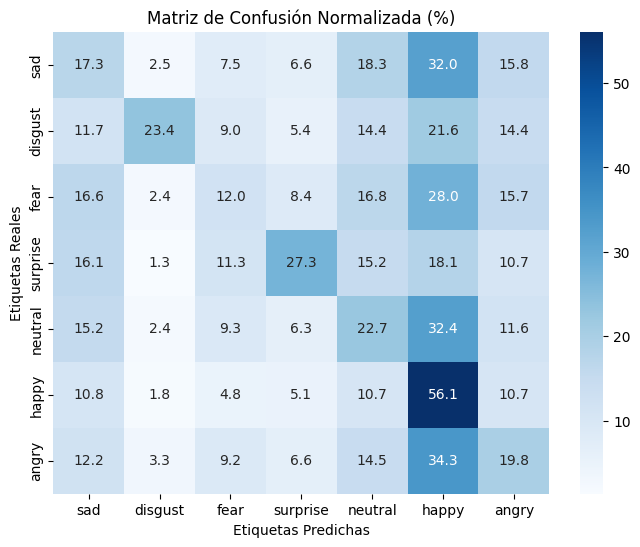

In [ ]:
precision = precision_score(Y_test_labels, test_pred2, average='macro')
accuracy = np.mean(test_pred2 == Y_test_labels)

precision *= 100
accuracy *= 100

resultados = pd.DataFrame({"Emoción": Y_test_labels, "Predicción Emoción": test_pred2})
resultados["Correcto"] = resultados["Emoción"] == resultados["Predicción Emoción"]

# Mostramos las diferentes métricas
print("Métricas de rendimiento del modelo elegido anteriormente:")
print("- Precision del modelo:", precision, "%")
print("- Accuracy del modelo:", accuracy, "%")

# Definir las etiquetas de las emociones
emociones = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(Y_test_labels, test_pred2)
confusion_percent = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]* 100
# Mostrar la matriz de confusión normalizada en forma gráfica
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_percent, annot=True, cmap='Blues', fmt='.1f',
xticklabels=orden_subcarpetas, yticklabels=orden_subcarpetas)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión Normalizada (%)')
plt.savefig('matriz_confusion.jpg')
plt.show()

<h2> SGD

In [ ]:
modelo_SGD = OneVsOneClassifier(SGDClassifier(alpha = 0.001,learning_rate= "optimal", random_state = 25))
modelo_SGD.fit(X_train_flat, Y_train_labels)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.001, random_state=25))

In [ ]:
pred_sgd = modelo_SGD.predict(X_test_flat)

Métricas de rendimiento del modelo elegido anteriormente:
- Precision del modelo: 27.42899172476772 %
- Accuracy del modelo: 29.49289495681248 %


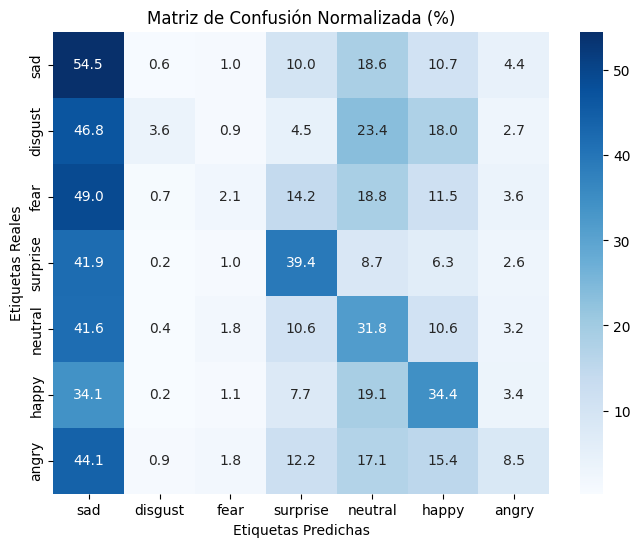

In [ ]:
precision = precision_score(Y_test_labels, pred_sgd, average='macro')
accuracy = np.mean(pred_sgd == Y_test_labels)

precision *= 100
accuracy *= 100

resultados = pd.DataFrame({"Emoción": Y_test_labels, "Predicción Emoción": pred_sgd})
resultados["Correcto"] = resultados["Emoción"] == resultados["Predicción Emoción"]

# Mostramos las diferentes métricas
print("Métricas de rendimiento del modelo elegido anteriormente:")
print("- Precision del modelo:", precision, "%")
print("- Accuracy del modelo:", accuracy, "%")

# Definir las etiquetas de las emociones
emociones = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(Y_test_labels, pred_sgd)
confusion_percent = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]* 100
# Mostrar la matriz de confusión normalizada en forma gráfica
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_percent, annot=True, cmap='Blues', fmt='.1f',
xticklabels=orden_subcarpetas, yticklabels=orden_subcarpetas)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión Normalizada (%)')
plt.savefig('matriz_confusion.jpg')
plt.show()

<h2> Con Data Augmentation

<h3> Rotamos imagen 40 grados

In [ ]:
#extracción de datos para train con data augmentation


# Definir el orden de las subcarpetas
orden_subcarpetas_aug = ["sad", "disgust", "fear", "surprise", "neutral", "happy","angry"]

# Procedemos a cargar la carpeta train que contiene varias subcarpetas, cada una de ellas es una emoción
print("Cargando dataset de imágenes:")

X_train_aug, Y_train_aug = [], []

# Definir aumentador de datos (data augmentation)
seq = iaa.Sequential([
    iaa.Affine(rotate=(-40, 40)),  # rotación aleatoria entre -20 y 20 grados
])

# Obtener la lista de subcarpetas en el orden deseado
subfolders_aug = sorted(glob.glob("train/*"), key=lambda x: orden_subcarpetas_aug.index(os.path.basename(x)))

for index, file in enumerate(subfolders_aug): # Recorremos las subcarpetas
    print(file.split("/")[-1])
    label_aug = np.zeros(7) # Creamos un vector con 7 casillas rellenas a 0, cada casilla es una etiqueta
    label_aug[index] = 1 # Rellenamos con un 1 el índice por el que se encuentra
    Xaux_aug, Yaux_aug = [], []
    for imagepath in tqdm(glob.glob(f"{file}/*.jpg")): # Recorremos las imágenes de cada carpeta
        image_aug = cv2.imread(imagepath, 0) # El 0 hace que lea la imagen en ByN
        del imagepath
        # Aplicar data augmentation a todas las imágenes
        Xaux_aug.append(image_aug)
        Yaux_aug.append(label_aug) # Guardamos también las etiquetas de las imágenes

        # Si la carpeta actual es "disgust", aplicamos data augmentation adicional
        if "disgust" in file.split("/")[-1]:
            for _ in range(4):
                augmented_img = seq(images=image_aug)
                Xaux_aug.append(augmented_img)
                Yaux_aug.append(label_aug) # Guardamos también las etiquetas de las imágenes
        if "fear" == file.split("/")[-1]:
          for _ in range(2):
              augmented_img = seq(images=image_aug)
              Xaux_aug.append(augmented_img)
              Yaux_aug.append(label_aug) # Guardamos también las etiquetas de las imágenes
        if "angry"in file.split("/")[-1]:
          for _ in range(2):
              augmented_img = seq(images=image_aug)
              Xaux_aug.append(augmented_img)
              Yaux_aug.append(label_aug)
        if "sad"in file.split("/")[-1]:
          for _ in range(2):
              augmented_img = seq(images=image_aug)
              Xaux_aug.append(augmented_img)
              Yaux_aug.append(label_aug)

    # Añadir datos al conjunto de entrenamiento
    X_train_aug += Xaux_aug
    Y_train_aug += Yaux_aug

# Convertir listas a arrays numpy
X_train_aug = np.array(X_train_aug)
Y_train_aug = np.array(Y_train_aug)

# Mostrar tanto el número de muestras como el número de etiquetas para el entrenamiento
print("[+] Número de muestras para el entrenamiento:", X_train_aug.shape[0])
print("[+] Número de etiquetas de entrenamiento:", Y_train_aug.shape[0])

Cargando dataset de imágenes:
sad


100%|██████████| 4830/4830 [00:05<00:00, 866.24it/s]


disgust


100%|██████████| 436/436 [00:00<00:00, 507.36it/s]


fear


100%|██████████| 4097/4097 [00:04<00:00, 887.00it/s]


surprise


100%|██████████| 3171/3171 [00:00<00:00, 5352.60it/s]


neutral


100%|██████████| 4965/4965 [00:00<00:00, 5335.52it/s]


happy


100%|██████████| 7215/7215 [00:01<00:00, 5547.65it/s]


angry


100%|██████████| 3995/3995 [00:04<00:00, 965.92it/s]


[+] Número de muestras para el entrenamiento: 56297
[+] Número de etiquetas de entrenamiento: 56297


In [ ]:
X_train_aug_flat = X_train_aug.reshape(X_train_aug.shape[0], -1)
#X_val_flat = X_val.reshape(X_val.shape[0], -1)
Y_train_aug_ = np.argmax(Y_train_aug, axis=1)

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=7).fit(X_train_aug_flat, Y_train_aug_)


In [ ]:
y_pred = neigh.predict(X_test_flat)

Métricas de rendimiento del modelo elegido anteriormente:
- Precision del modelo: 32.7006907971185 %
- Accuracy del modelo: 32.669267205349676 %


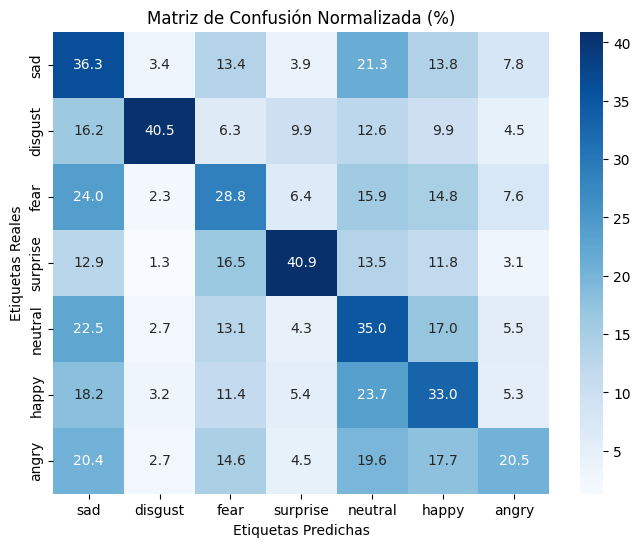

In [ ]:
# Calculamos las diferentes métricas de rendimiento del modelo escogido

precision = precision_score(Y_test_labels, y_pred, average='macro')
accuracy = np.mean(y_pred == Y_test_labels)


precision *= 100
accuracy *= 100

resultados = pd.DataFrame({"Emoción": Y_test_labels, "Predicción Emoción": y_pred})
resultados["Correcto"] = resultados["Emoción"] == resultados["Predicción Emoción"]

# Mostramos las diferentes métricas
print("Métricas de rendimiento del modelo elegido anteriormente:")
print("- Precision del modelo:", precision, "%")
print("- Accuracy del modelo:", accuracy, "%")

# Definir las etiquetas de las emociones
emociones = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(Y_test_labels, y_pred)
confusion_percent = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]* 100
# Mostrar la matriz de confusión normalizada en forma gráfica
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_percent, annot=True, cmap='Blues', fmt='.1f',
xticklabels=orden_subcarpetas, yticklabels=orden_subcarpetas)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión Normalizada (%)')
plt.savefig('matriz_confusion.jpg')
plt.show()

In [ ]:
rang_n_trees = np.arange(1, 50)
tuned_parameters = [{'n_estimators': rang_n_trees}]
nfold = 3

clf_rf = GridSearchCV(RandomForestClassifier(random_state=random_state), tuned_parameters, cv=nfold).fit(X_train_aug_flat, Y_train_aug_)
n_trees_opt = clf_rf.best_estimator_.n_estimators

acc_train = clf_rf.score(X_train_aug_flat, Y_train_aug_)
acc_test = clf_rf.score(X_test_flat, Y_test_labels)

In [ ]:
y_pred = clf_rf.predict(X_test_flat)

In [ ]:
# Calculamos las diferentes métricas de rendimiento del modelo escogido

precision = precision_score(Y_test_labels, y_pred, average='macro')
accuracy = np.mean(y_pred == Y_test_labels)


precision *= 100
accuracy *= 100

resultados = pd.DataFrame({"Emoción": Y_test_labels, "Predicción Emoción": y_pred})
resultados["Correcto"] = resultados["Emoción"] == resultados["Predicción Emoción"]

# Mostramos las diferentes métricas
print("Métricas de rendimiento del modelo elegido anteriormente:")
print("- Precision del modelo:", precision, "%")
print("- Accuracy del modelo:", accuracy, "%")

# Definir las etiquetas de las emociones
emociones = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(Y_test_labels, y_pred)
confusion_percent = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]* 100
# Mostrar la matriz de confusión normalizada en forma gráfica
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_percent, annot=True, cmap='Blues', fmt='.1f',
xticklabels=orden_subcarpetas, yticklabels=orden_subcarpetas)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión Normalizada (%)')
plt.savefig('matriz_confusion.jpg')
plt.show()

NameError: name 'y_pred' is not defined

<h3>Imagen Espejo

In [ ]:
# Definir el orden de las subcarpetas
orden_subcarpetas = ["sad", "disgust", "fear", "surprise", "neutral", "happy","angry"]

# Procedemos a cargar la carpeta train que contiene varias subcarpetas, cada una de ellas es una emoción
print("Cargando dataset de imágenes:")

X_train, Y_train = [], []

# Data augmentation
seq = iaa.Sequential([
    iaa.Fliplr(1.0)
])

# Obtener la lista de subcarpetas en el orden deseado

subfolders = sorted(glob.glob("train/*"), key=lambda x: orden_subcarpetas.index(os.path.basename(x)))

for index, file in enumerate(subfolders): # Recorremos las subcarpetas
    print(file.split("/")[-1])
    label = np.zeros(7) # Creamos un vector con 7 casillas rellenas a 0, cada casilla es una etiqueta
    label[index] = 1 # Rellenamos con un 1 el índice por el que se encuentra
    Xaux, Yaux = [], []
    for imagepath in tqdm(glob.glob(f"{file}/*.jpg")): # Recorremos las imágenes de cada carpeta
        image = cv2.imread(imagepath, 0) # El 0 hace que lea la imagen en ByN
        del imagepath
        Xaux.append(image)
        Yaux.append(label)
        if "disgust" in file.split("/")[-1]:
            for _ in range(1):
                augmented_img = seq(images=image)
                Xaux.append(augmented_img)
                Yaux.append(label)
        if "fear" in file.split("/")[-1]:
              for _ in range(1):
                augmented_img = seq(images=image)
                Xaux.append(augmented_img)
                Yaux.append(label)
        if "angry"in file.split("/")[-1]:
              for _ in range(1):
                augmented_img = seq(images=image)
                Xaux.append(augmented_img)
                Yaux.append(label)
        if "sad"in file.split("/")[-1]:
              for _ in range(1):
                augmented_img = seq(images=image)
                Xaux.append(augmented_img)
                Yaux.append(label)
        if "surprise"in file.split("/")[-1]:
              for _ in range(1):
                augmented_img = seq(images=image)
                Xaux.append(augmented_img)
                Yaux.append(label)
        if "neutral"in file.split("/")[-1]:
              for _ in range(1):
                augmented_img = seq(images=image)
                Xaux.append(augmented_img)
                Yaux.append(label)
        if "happy"in file.split("/")[-1]:
              for _ in range(1):
                augmented_img = seq(images=image)
                Xaux.append(augmented_img)
                Yaux.append(label)

    # Añadir datos al conjunto de entrenamiento
    X_train += Xaux
    Y_train += Yaux

# Convertir listas a arrays numpy
X_train = np.array(X_train)
Y_train = np.array(Y_train)

# Mostrar tanto el número de muestras como el número de etiquetas para el entrenamiento
print("[+] Número de muestras para el entrenamiento:", X_train.shape[0])
print("[+] Número de etiquetas de entrenamiento:", Y_train.shape[0])


Cargando dataset de imágenes:
sad


100%|██████████| 4830/4830 [00:02<00:00, 2305.65it/s]


disgust


100%|██████████| 436/436 [00:00<00:00, 2308.53it/s]


fear


100%|██████████| 4097/4097 [00:01<00:00, 2746.82it/s]


surprise


100%|██████████| 3171/3171 [00:01<00:00, 2645.44it/s]


neutral


100%|██████████| 4965/4965 [00:02<00:00, 2377.23it/s]


happy


100%|██████████| 7215/7215 [00:03<00:00, 2374.93it/s]


angry


100%|██████████| 3995/3995 [00:01<00:00, 2705.67it/s]


[+] Número de muestras para el entrenamiento: 57418
[+] Número de etiquetas de entrenamiento: 57418


In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
Y_train_labels = np.argmax(Y_train, axis=1)

In [ ]:
modelo_2 = RandomForestClassifier(n_jobs=-1,random_state=random_state).fit(X_train, Y_train_labels)

In [ ]:

model = OneVsOneClassifier(RandomForestClassifier(n_jobs=-1,random_state=42), n_jobs=-1).fit(X_train, Y_train_labels)


In [ ]:
# Definir el orden de las subcarpetas, esto se hace porque colab las lee de forma aleatoria y así aseguramos siempre el mismo orden
orden_subcarpetas = ["sad", "disgust", "fear", "surprise", "neutral", "happy", "angry"]
# Comenzamos leyendo todas las subcarpetas que se encuentran en la carpeta "test" para ir cargando las imágenes con las que hacer luego predicciones
print("Cargando dataset de imágenes para hacer predicciones...")
Xtest, Ytest = [], []
# Obtener la lista de subcarpetas en el orden deseado
subfolders = sorted(glob.glob("test/*"), key=lambda x: orden_subcarpetas.index(os.path.basename(x)))

for index, file in enumerate(subfolders):
  print(file.split("/")[-1])
  label = np.zeros(7) # Creamos un vector con 7 casillas rellenas a 0, cada casilla es una etiqueta
  label[index] = 1 # Rellenamos con un 1 el índice por el que se encuentra, por lo que, habiendo 7 casillas con 0, la que tenga un 1 indica la emoción que es
  Xaux, Yaux = [], []
  for imagepath in tqdm(glob.glob(f"{file}/*.jpg")):
    image = cv2.imread(imagepath, 0) # El 1 hace que lea la imagen con 3 canales
    Xaux.append(image)
    Yaux.append(label) # Guardamos las etiquetas de las emociones
  Xtest = Xtest + Xaux
  Ytest = Ytest + Yaux
  del Xaux, Yaux
X_test = np.array(Xtest)
Y_test = np.array(Ytest)
print("[+] Número de muestras del entrenamiento:", X_test.shape[0])
print("[+] Número de etiquetas de entrenamiento:", Y_test.shape[0])

Cargando dataset de imágenes para hacer predicciones...
sad


100%|██████████| 1247/1247 [00:00<00:00, 2526.15it/s]


disgust


100%|██████████| 111/111 [00:00<00:00, 7686.44it/s]


fear


100%|██████████| 1024/1024 [00:00<00:00, 3481.76it/s]


surprise


100%|██████████| 831/831 [00:00<00:00, 4503.08it/s]


neutral


100%|██████████| 1233/1233 [00:00<00:00, 3842.07it/s]


happy


100%|██████████| 1774/1774 [00:00<00:00, 3774.80it/s]


angry


100%|██████████| 958/958 [00:00<00:00, 4563.43it/s]

[+] Número de muestras del entrenamiento: 7178
[+] Número de etiquetas de entrenamiento: 7178


Métricas de rendimiento del modelo elegido anteriormente:
- Accuracy del modelo: 46.8236277514628 %
- Precision del modelo: 55.81660573226049 %
- Recall del modelo: 42.024692089206596 %


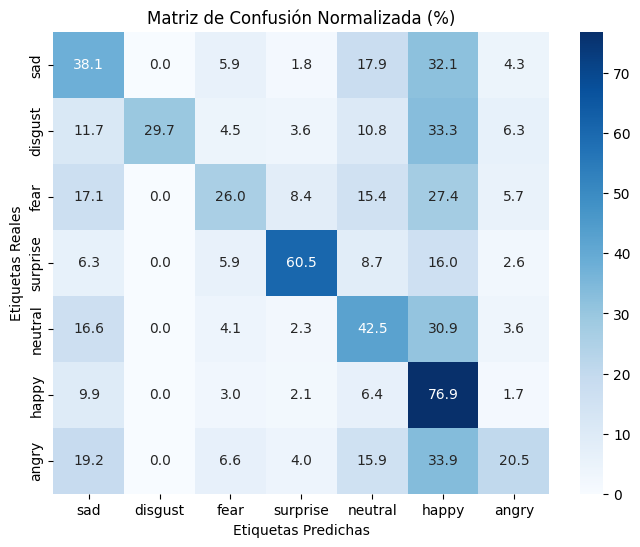

In [ ]:
x_test = X_test.reshape(X_test.shape[0], -1)
Y_test_labels = np.argmax(Y_test, axis=1)
test_pred = modelo_2.predict(x_test)
# Calculamos las diferentes métricas de rendimiento del modelo escogido

accuracy = np.mean(test_pred == Y_test_labels)
precision = precision_score(Y_test_labels, test_pred, average='macro')
recall = recall_score(Y_test_labels, test_pred, average='macro')

# Convertir las métricas en porcentaje
accuracy *= 100
precision *= 100
recall *= 100



# Mostramos las diferentes métricas
print("Métricas de rendimiento del modelo elegido anteriormente:")
print("- Accuracy del modelo:", accuracy, "%")
print("- Precision del modelo:", precision, "%")
print("- Recall del modelo:", recall, "%")

# Definir las etiquetas de las emociones
emociones = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# Calcular la matriz de confusión
confusion_mat = confusion_matrix(Y_test_labels, test_pred)
confusion_percent = confusion_mat.astype('float') / confusion_mat.sum(axis=1)[:, np.newaxis]* 100
# Mostrar la matriz de confusión normalizada en forma gráfica
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_percent, annot=True, cmap='Blues', fmt='.1f',
xticklabels=orden_subcarpetas, yticklabels=orden_subcarpetas)
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión Normalizada (%)')
plt.savefig('matriz_confusion.jpg')
plt.show()
